### Text Mining & Image Recognition

### Laboratorio 1

#### Nery Fuentes 15004337

### Problema 1

Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la función debe devolver una imagen la cual tenga activos los canales de color según los siguientes puntos:

- Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.
- Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.
- Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.
- Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y verde.
- Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y azul.
- Si el parámetro color vale 30, la imagen debe mostrar activos únicamente los colores azul y rojo.

#### importar librerias

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


#### Definir funcion

In [25]:
def fn_activarColor(imagen, color):
    
    ## hacer copia de la imagen
    resultado = imagen
    
    ## separar los canles
    b,g, r =  cv2.split(resultado)
    
    ## temporal con colores vacios
    tmp = np.zeros_like(b)
    
    ## dejar solo el color solicitado
    
    #mostrar activos únicamente el color azul
    if color ==1:
        resultado = cv2.merge([b, tmp, tmp])
        
    #mostrar activos únicamente el color verde
    elif color ==2:
        resultado = cv2.merge([tmp, g, tmp])
        
    #mostrar activos únicamente el color rojo
    elif color == 3:
        resultado = cv2.merge([tmp, tmp, r])
        
    #mostrar activos únicamente el color rojo y verde
    elif color ==10:
        resultado = cv2.merge([tmp,g,r])
        
    #mostrar activos únicamente el color verde y azul
    elif color ==20:
        resultado = cv2.merge([b,g, tmp])
    #mostrar activos únicamente el color azul y rojo
    elif color == 30:
        resulado= cv2.merge([b, tmp, r])
    
    return resultado


#### Importar Imagen  y procesarla con la funcion

<function matplotlib.pyplot.show(close=None, block=None)>

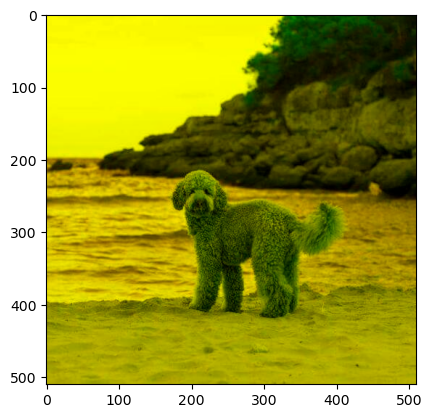

In [30]:
imagen = cv2.imread("imagen1.jpg")

res  = fn_activarColor(imagen, 20)


plt.imshow(res)
plt.show
#cv2.imshow("imagen", res)

#cv2.waitKey(0)

### Problema 2:
En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises (imagen1,
imagen2, perro) estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una
funcion que dadas las 3 imagenes se construya la imagen original a color.

**Definir funcion**

In [38]:
def fn_reconstruir_imagen(imagen_rojo, imagen_verde, imagen_azul):
    #cargar las imagenes
    imagen_r = cv2.imread(imagen_rojo , cv2.IMREAD_GRAYSCALE)
    imagen_v = cv2.imread(imagen_verde, cv2.IMREAD_GRAYSCALE)
    imagen_a = cv2.imread(imagen_azul,  cv2.IMREAD_GRAYSCALE)
    
    #reconstruir
    resultado = cv2.merge([imagen_a, imagen_v, imagen_r])
    
    return resultado
    

**Convertir imagen**

<function matplotlib.pyplot.show(close=None, block=None)>

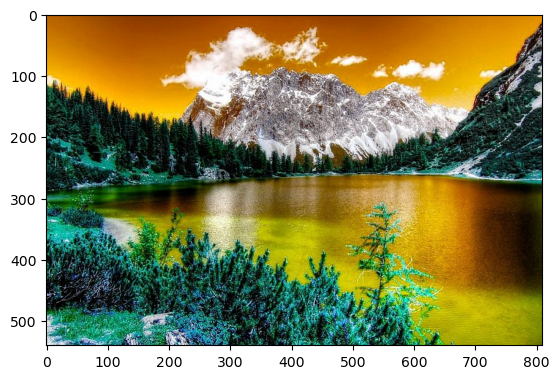

In [39]:
res2  = fn_reconstruir_imagen(
    "./imagen1/imagen1_salida_gray_rojo.jpg",
    "./imagen1/imagen1_salida_gray_verde.jpg",
    "./imagen1/imagen1_salida_gray_azul.jpg")

plt.imshow(res2)
plt.show

**Convertir imagen**

<function matplotlib.pyplot.show(close=None, block=None)>

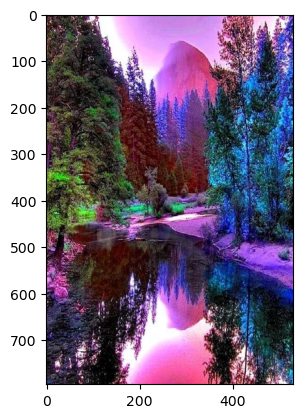

In [42]:
res22  = fn_reconstruir_imagen(
    "./imagen2/imagen2_salida_gray_rojo.jpg",
    "./imagen2/imagen2_salida_gray_verde.jpg",
    "./imagen2/imagen2_salida_gray_azul.jpg")

plt.imshow(res22)
plt.show

**Convertir imagen**


<function matplotlib.pyplot.show(close=None, block=None)>

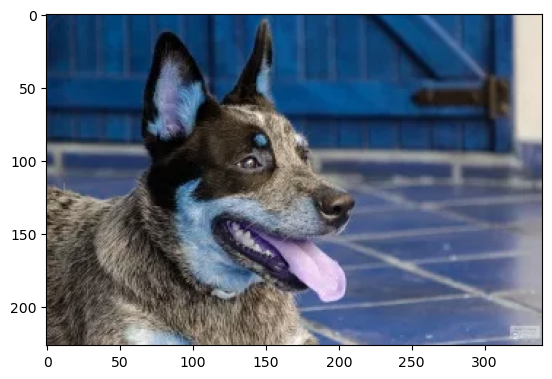

In [43]:
res23  = fn_reconstruir_imagen(
    "./perro/perro_salida_gray_rojo.jpg",
    "./perro/perro_salida_gray_verde.jpg",
    "./perro/perro_salida_gray_azul.jpg")

plt.imshow(res23)
plt.show

### Problema 3:
Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir
una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.

**IMAGEN ORIGINAL**

<function matplotlib.pyplot.show(close=None, block=None)>

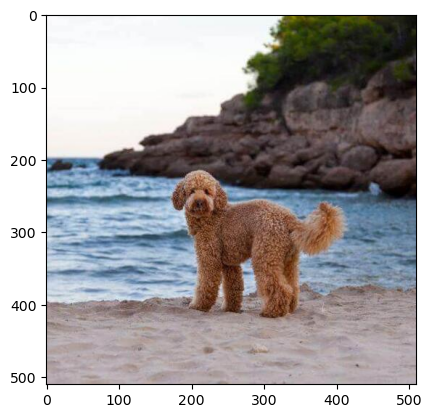

In [47]:
imagen_original = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_original)
plt.show

**Definir funcion**

In [61]:
def fn_convertir3D_gris(imagen):
    #separa canales
    b, g, r = cv2.split(imagen)
    
    imagen_azul=   cv2.cvtColor(b, cv2.COLOR_GRAY2BGR)
    imagen_verde = cv2.cvtColor(g, cv2.COLOR_GRAY2BGR)
    imagen_rojo  = cv2.cvtColor(r, cv2.COLOR_GRAY2BGR)
    
    return imagen_azul, imagen_verde,imagen_rojo
    
    
    

#### Imagen Azul

<function matplotlib.pyplot.show(close=None, block=None)>

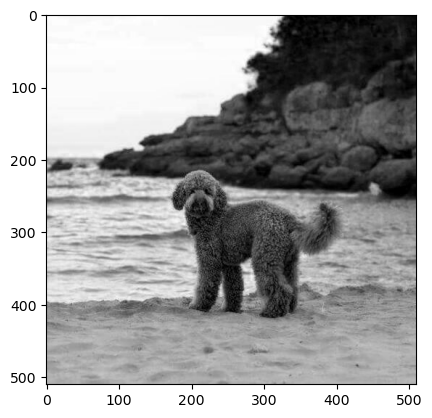

In [62]:
res_azul, res_verde, res_rojo = fn_convertir3D_gris(imagen)
plt.imshow(res_azul)
plt.show

#### Imagen Verde

<function matplotlib.pyplot.show(close=None, block=None)>

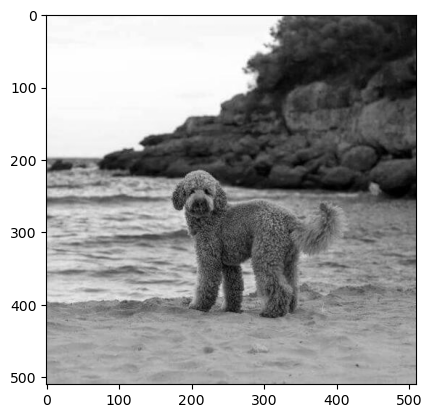

In [65]:
plt.imshow(res_verde)
plt.show

#### Imagen Rojo

<function matplotlib.pyplot.show(close=None, block=None)>

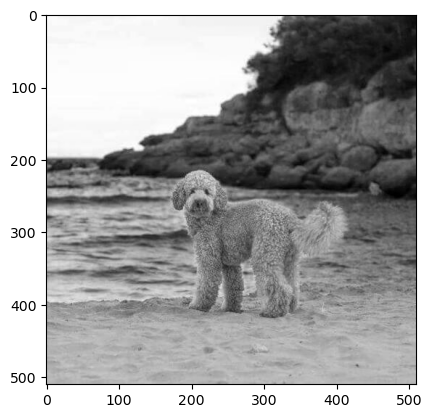

In [66]:
plt.imshow(res_rojo)
plt.show

### Problema 4:
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una lnea vertical la cual muestre el valor de la media
de la distribucion.

In [101]:
def fn_histograma(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    gris = np.zeros ((alto, ancho,1))
    
    a=[]
    v=[]
    r=[]
    g=[]
    
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel=img[i][j]
            a.append(pixel[0])
            v.append(pixel[1])
            r.append(pixel[2])
            gris [i][j]=int(0.299* pixel[0] + 0.587 * pixel[2]+ 0.114** pixel[0] ) 
            
            
    mean_value= np.mean(a)
    plt.hist(a, bins=30, color='skyblue', edgecolor='black')
    plt.axvline(mean_value, color='k', linestyle='dashed', linewidth=1)
    plt.text(mean_value + 5, 100, f'Media: {mean_value:.2f}', color='r')
    plt.xlabel('Valores')
    plt.ylabel('Frequencia')
    plt.title('Canal Azul')
    plt.show()
    
    mean_value= np.mean(v)
    plt.hist(v, bins=30, color='lightgreen', edgecolor='black')
    plt.axvline(mean_value, color='k', linestyle='dashed', linewidth=1)
    plt.text(mean_value + 5, 100, f'Media: {mean_value:.2f}', color='r')
    plt.xlabel('Valores')
    plt.ylabel('Frequencia')
    plt.title('Canal Verde')
    plt.show()
    
    mean_value= np.mean(r)
    plt.hist(r, bins=30, color='crimson', edgecolor='black')
    plt.axvline(mean_value, color='k', linestyle='dashed', linewidth=1)
    plt.text(mean_value + 5, 100, f'Media: {mean_value:.2f}', color='w')
    plt.xlabel('Valores')
    plt.ylabel('Frequencia')
    plt.title('Canal Rojo')
    plt.show()
 
            

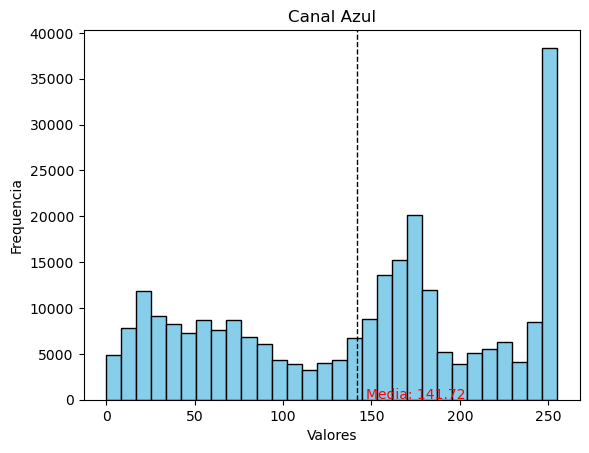

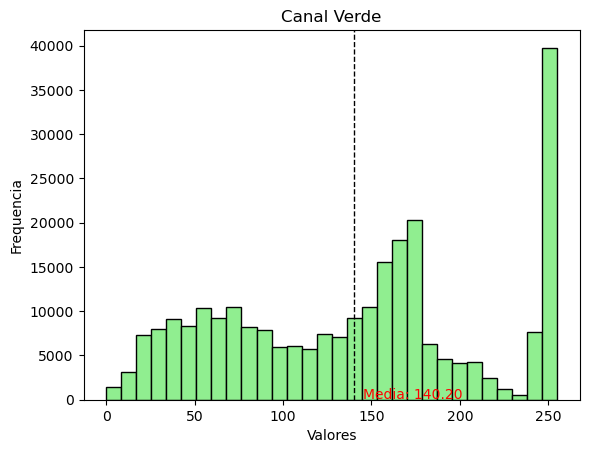

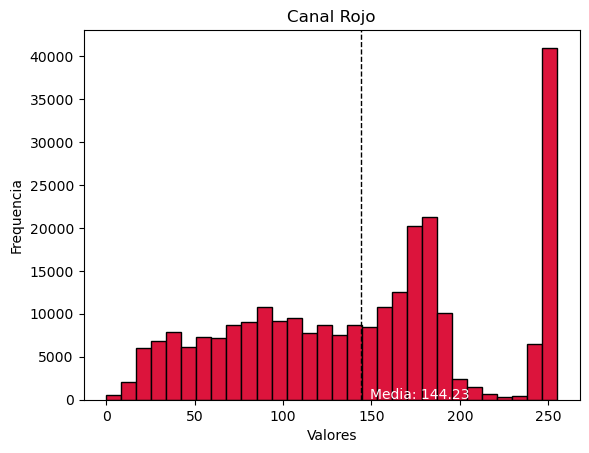

In [102]:
fn_histograma(imagen)

 

### Problema 5:
Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
funcion que dada una imagen, realice una escala de grises ponderada.

La **Escala de grises ponderada** se refiere a convertir una imagen en scala de grises donde se asigna un porcentaje de contribucion o pesos para caca canala de color (rojo, verde, azul), la formula mas comun para realizar este proceso es:

Escala gris = (0.299 * R) + (0.587 * G) + (0.114 * B)



#### Definir funcion

In [125]:
def fn_scalaGris_ponderada(img):
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img)
    plt.show()
    
    alto = img.shape[0]
    ancho = img.shape[1]
    gris_ponderado = np.zeros((alto, ancho,1))
    
    for i in range(0, alto):
        for j in range(0,ancho):
            pixel = img[i,j]
            blue= pixel[2]
            green = pixel[1]
            red=pixel[0]

            gris_ponderado[i,j]= int(0.299*red+0.587*green+0.11*blue)
            
    return gris_ponderado
    

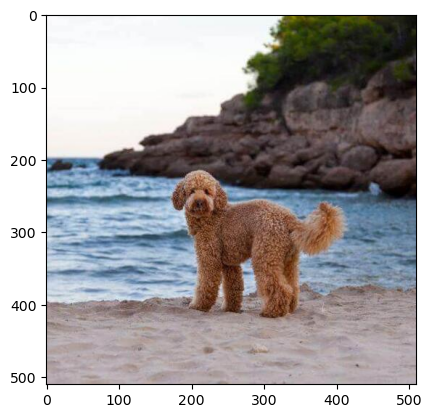

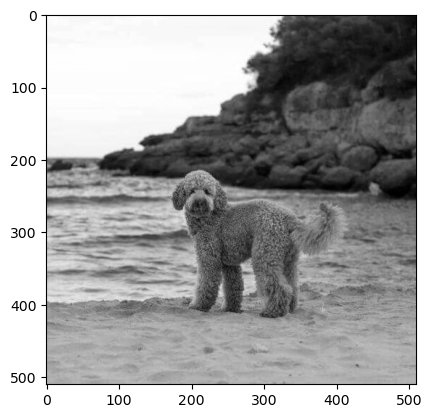

In [127]:
res5 = fn_scalaGris_ponderada(imagen)

plt.imshow(res5, cmap="gray")
plt.show()

### Problema 6:
Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook
donde trabajo los demas ejercicios.

### HSV 
se acerca más a cómo los humanos perciben el color. Tiene tres componentes: 
- Tono (HUE), 
- Saturación (Saturation)
- Valor (Value)

Este espacio de color describe los colores (matiz) en términos de su tono (saturación o cantidad de gris) y su valor de brillo.

Profundizando en los parametros:

**HUE:**

El tono (HUE) es la parte de color del modelo, expresada como un número de 0 a 360 grados:

- El rojo cae entre 0 y 60 grados.
- El amarillo cae entre 61 y 120 grados.
- El verde cae entre 121 y 180 grados.
- El cian se sitúa entre 181 y 240 grados.
- El azul cae entre 241 y 300 grados.
- Magenta cae entre 301 y 360 grados.

**Saturation:**

La saturación describe la cantidad de gris en un color, del 0 al 100 por ciento. Reducir este valor a cero introduce más gris y produce un efecto descolorido. 

**Value**

El valor funciona junto con la saturación y describe el brillo o la intensidad del color, de 0 a 100 por ciento, donde 0 es completamente negro y 100 es el más brillante y revela la mayor cantidad de color.
